Shape of the dataset: (7043, 21)

Columns in the dataset:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Sample data:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProt

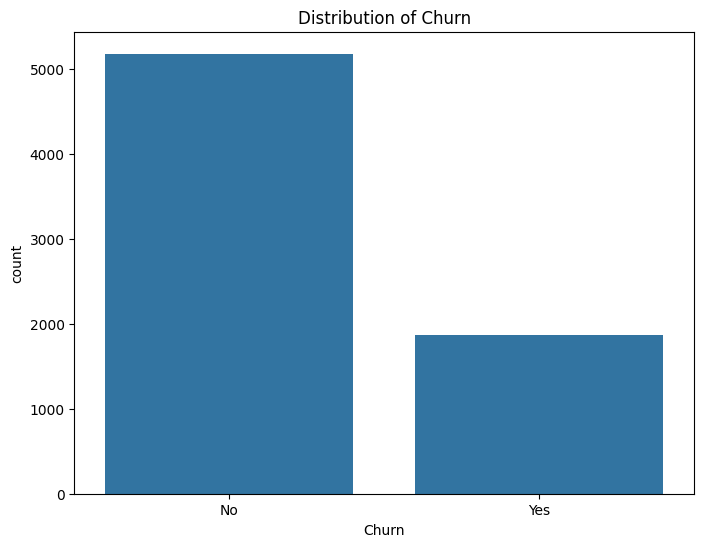

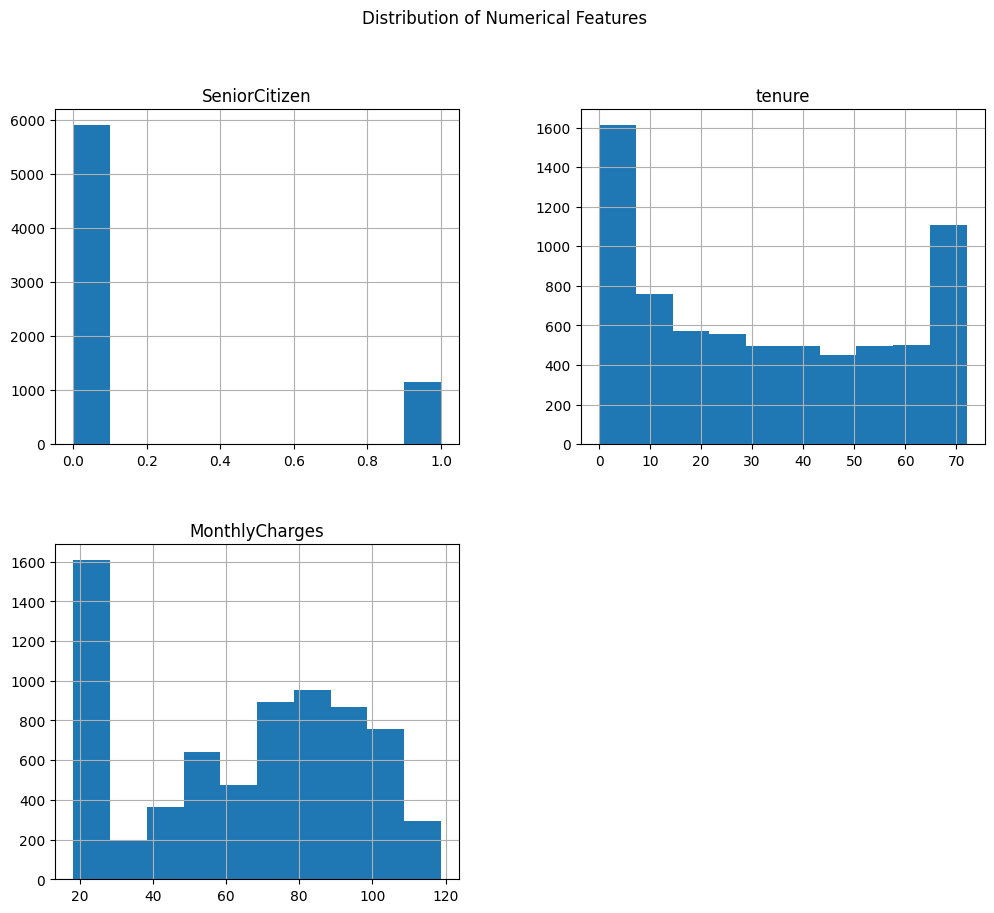

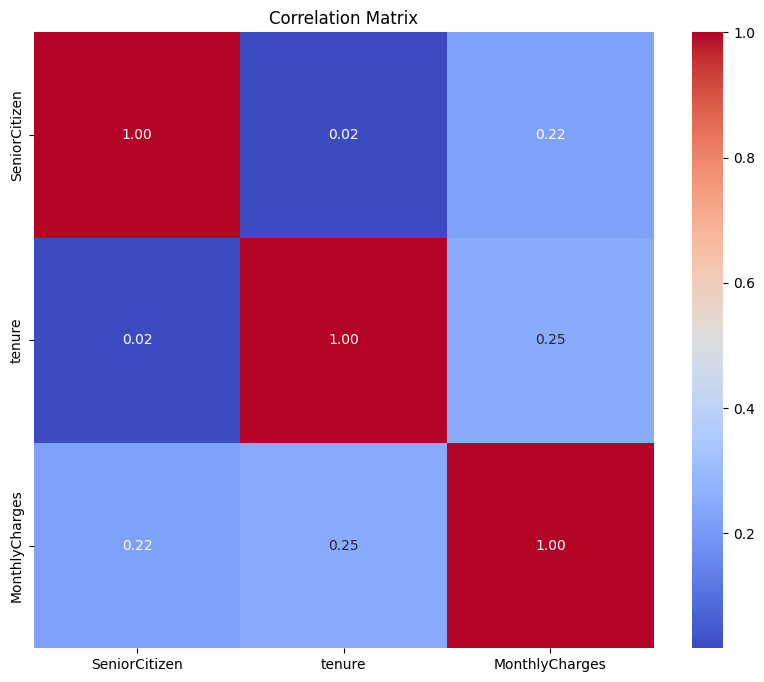

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
telco_data = pd.read_csv("telco_customer_churn.csv") 

# Display basic information about the dataset
print("Shape of the dataset:", telco_data.shape)
print("\nColumns in the dataset:")
print(telco_data.columns)
print("\nSample data:")
print(telco_data.head())

# Summary statistics
print("\nSummary statistics:")
print(telco_data.describe())

# Check for missing values
print("\nMissing values:")
print(telco_data.isnull().sum())

print("\nColumn names : ")
print(telco_data.columns.values)

print("\nColumns Data Types : ")
print(telco_data.dtypes)
# Check for duplicate rows
print("\nDuplicate rows:", telco_data.duplicated().sum())

# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=telco_data)
plt.title('Distribution of Churn')
plt.show()

# Visualize the distribution of numerical features
numerical_features = telco_data.select_dtypes(include=[np.number]).columns.tolist()
telco_data[numerical_features].hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = telco_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()






In [52]:
print(100*telco_data['Churn'].value_counts()/len(telco_data['Churn']))
print(telco_data['Churn'].value_counts())
telco_base_data=telco_data.copy()

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64
No     5174
Yes    1869
Name: Churn, dtype: int64


In [53]:
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [54]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]
telco_data.dropna(how='any',inplace=True)
telco_data.shape


(7032, 21)

In [55]:
print(telco_data['tenure'].max())

72


In [56]:
labels=["{0} - {1}".format(i,i+11)for i in range(1,72,12)]
telco_data['tenure_group']=pd.cut(telco_data.tenure,range(1,80,12), right=False, labels=labels)


In [57]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [58]:
telco_data.drop(columns=['customerID'],axis=1,inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [59]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


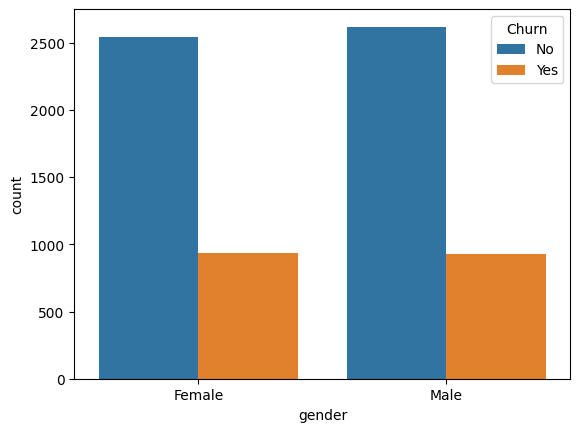

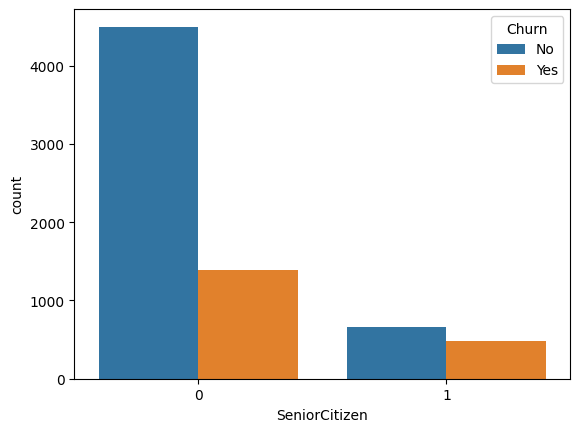

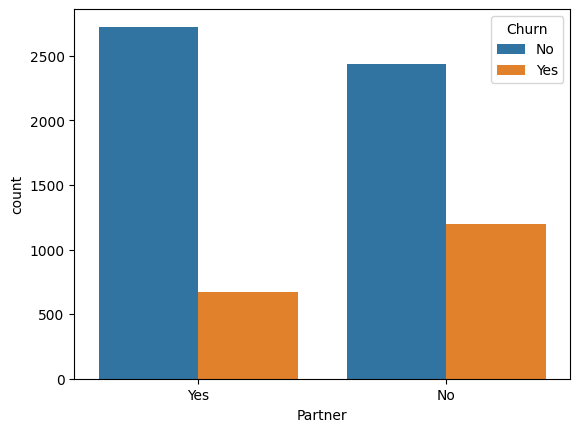

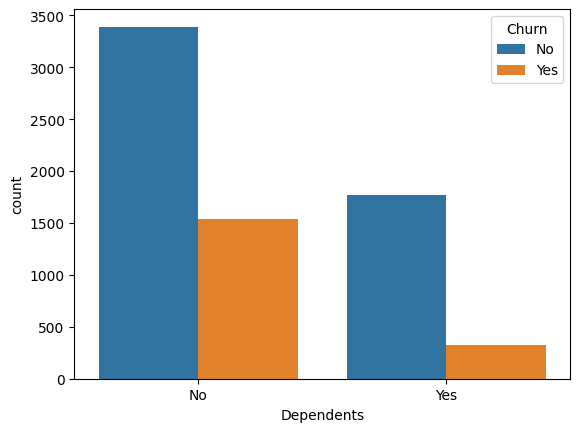

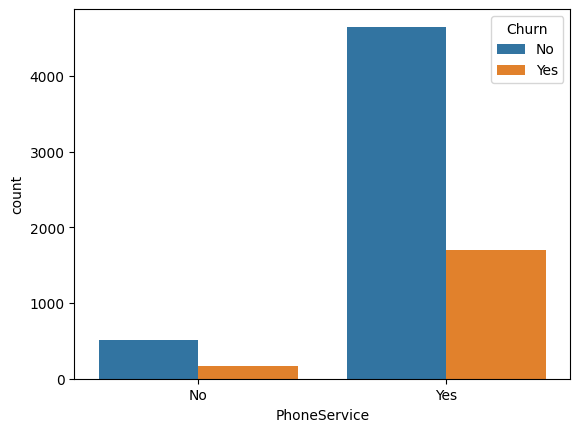

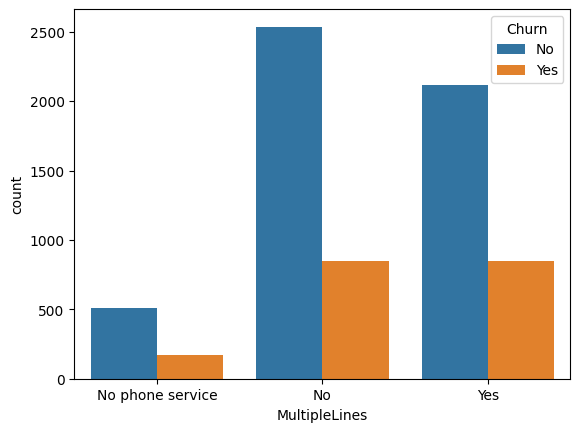

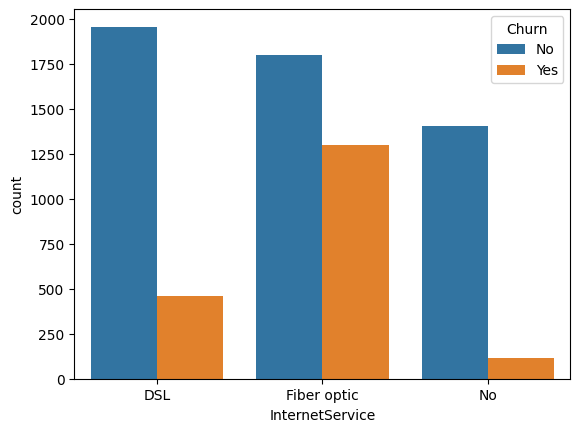

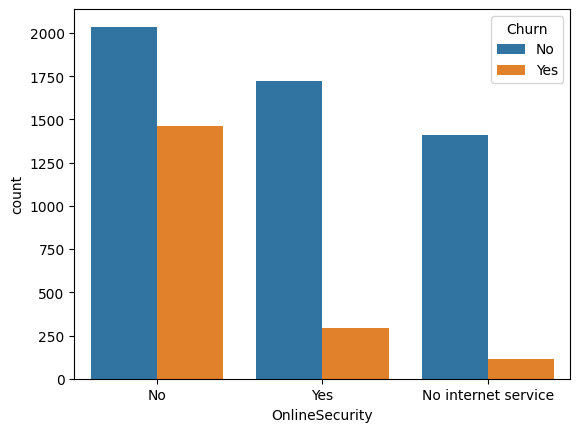

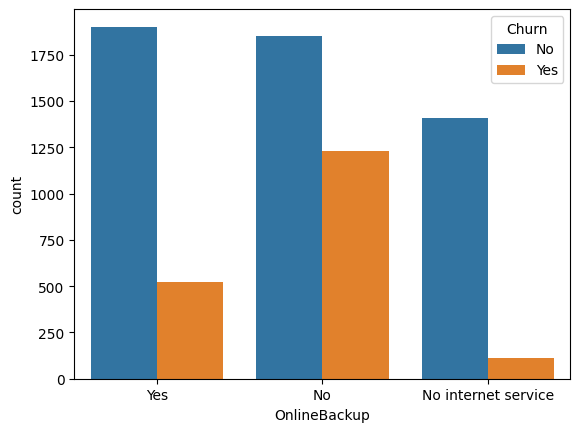

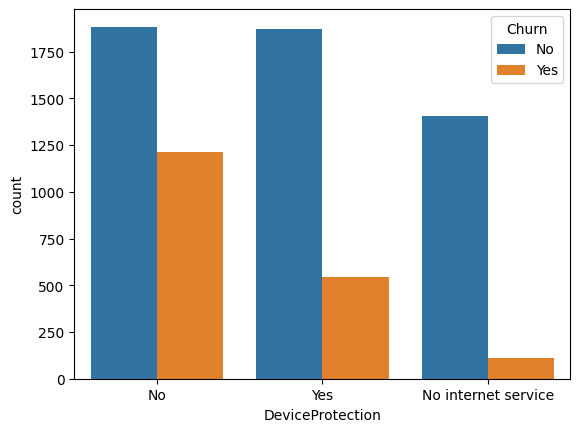

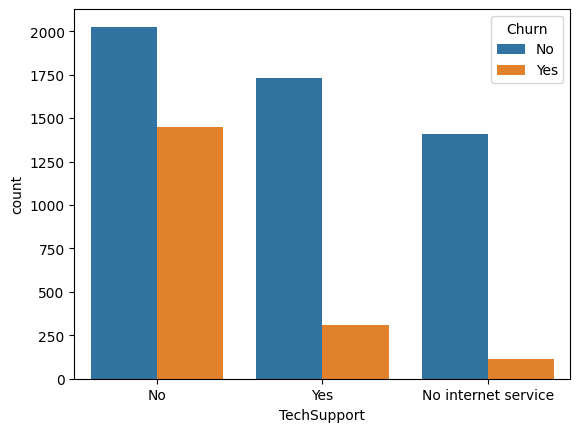

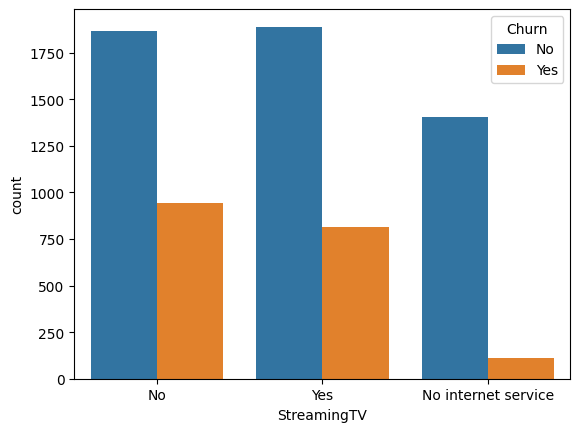

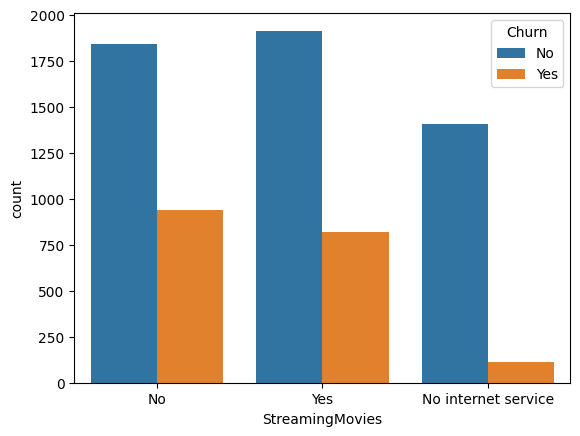

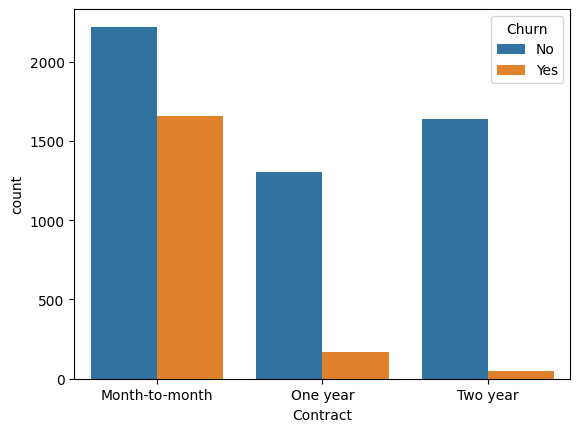

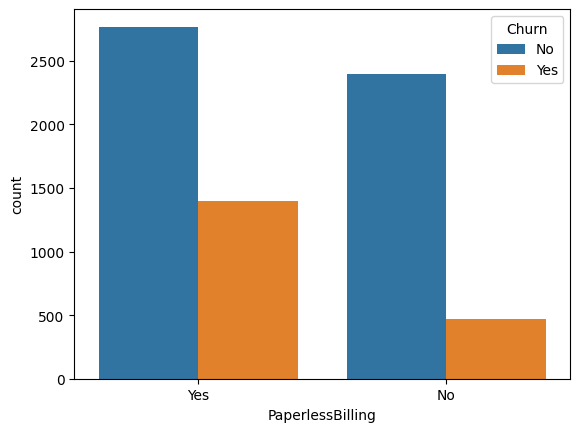

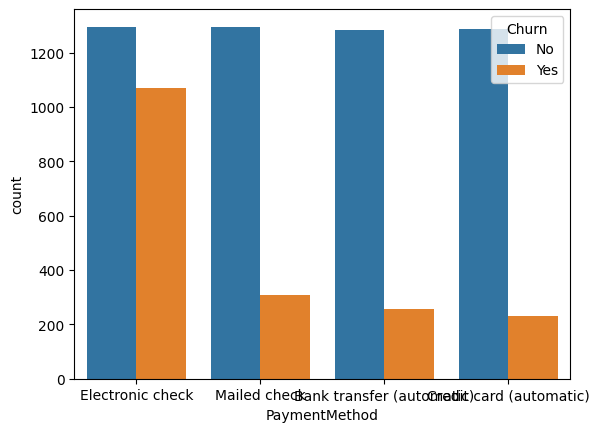

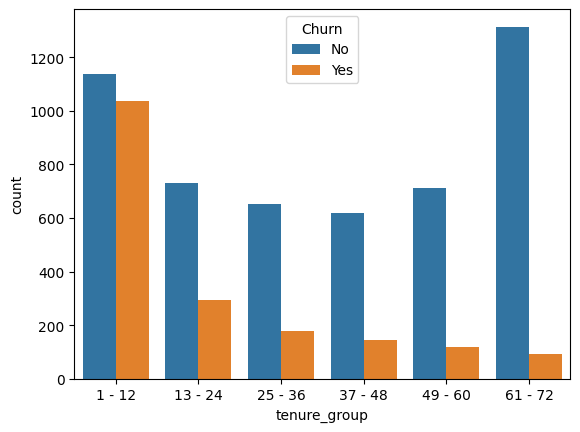

In [60]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=telco_data,x=predictor,hue='Churn')

In [61]:
telco_data['Churn']=np.where(telco_data.Churn=='Yes',1,0)

In [62]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [63]:
telco_data_dummies=pd.get_dummies(telco_data,dtype=int)
telco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


<Axes: >

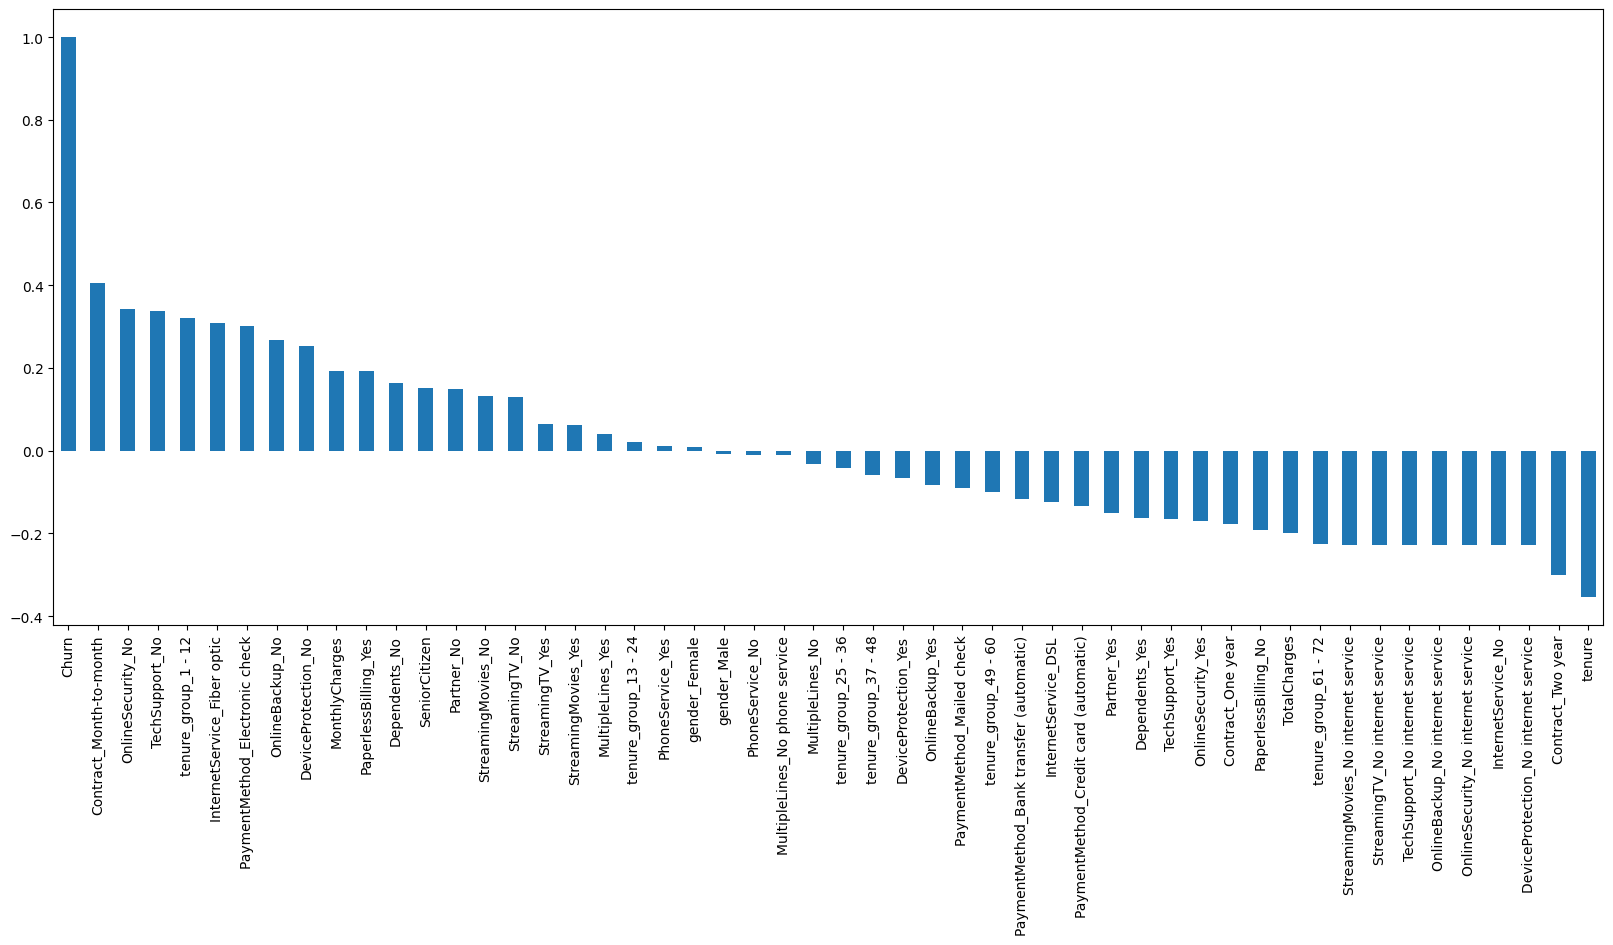

In [64]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

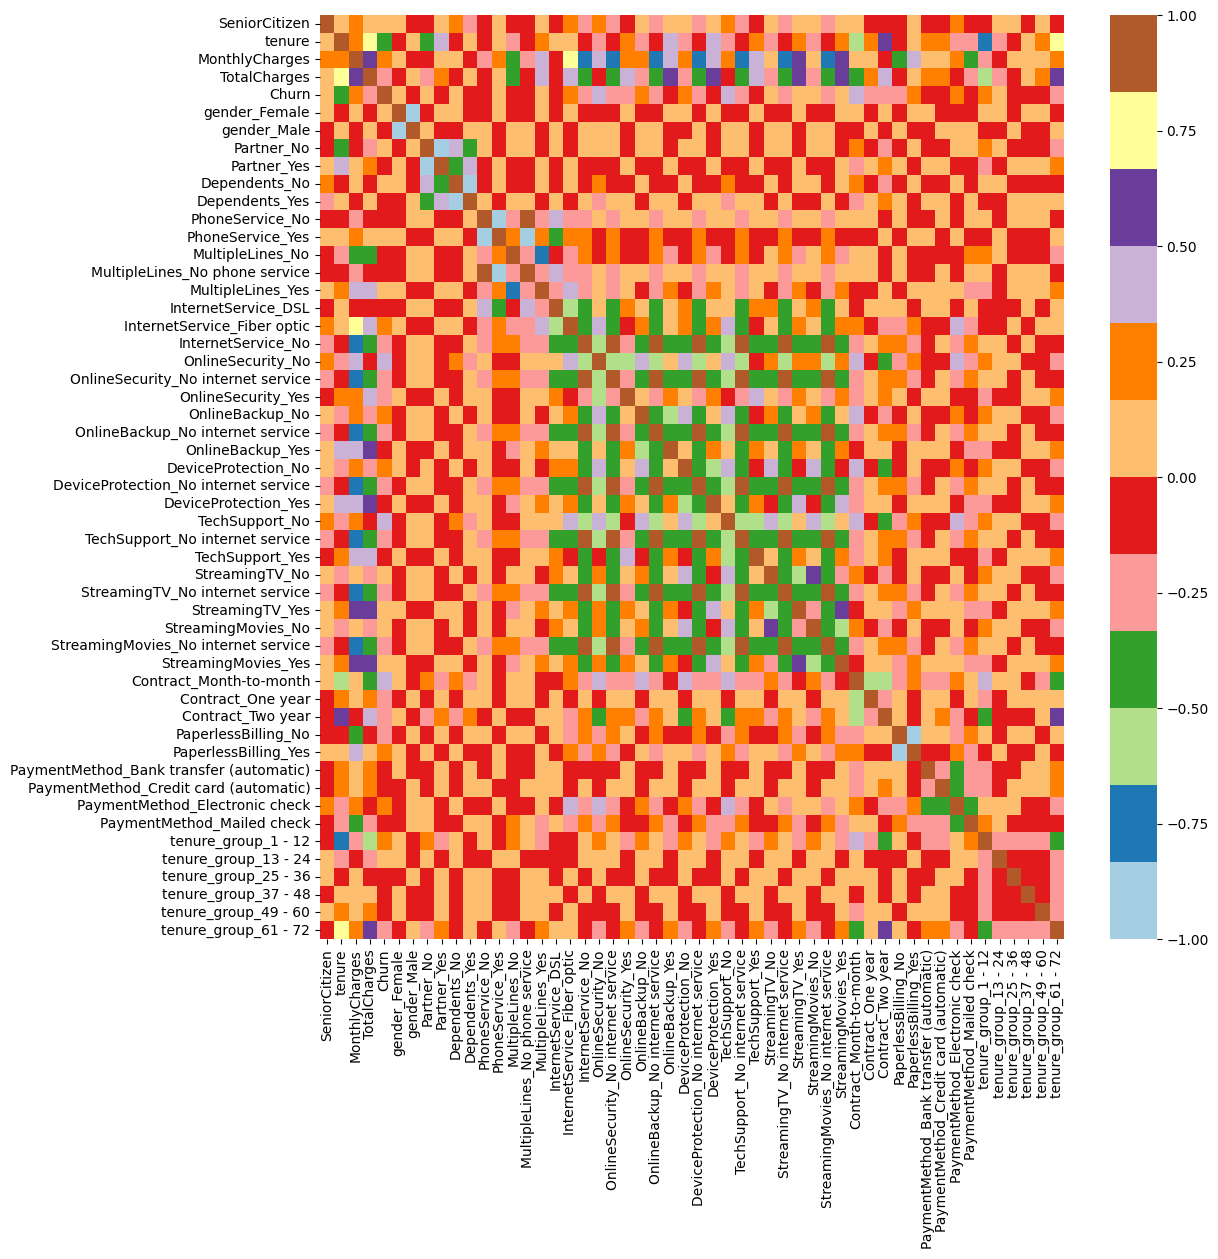

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(),cmap="Paired")

In [66]:
df_target_churn0=telco_data.loc[telco_data["Churn"]==0]
df_target_churn1=telco_data.loc[telco_data["Churn"]==1]

#model

In [67]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [68]:
df=telco_data_dummies.copy()
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [69]:
X=df.drop("Churn",axis=1)
Y=df['Churn']


In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [72]:
Y_predict=dt.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_predict))
print(confusion_matrix(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.58      0.56      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.78      0.78      1407

[[883 150]
 [164 210]]


In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
Y_rf_pred=rf.predict(X_test)
print(classification_report(Y_test,Y_rf_pred))
print(confusion_matrix(Y_test,Y_rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

[[931 102]
 [204 170]]


In [75]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X_resampled,Y_resampled=sm.fit_resample(X,Y)
Xr_train,Xr_test,Yr_train,Yr_test=train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)
print(Y_resampled.value_counts())
print(Y.value_counts())


1    3237
0    2600
Name: Churn, dtype: int64
0    5163
1    1869
Name: Churn, dtype: int64


In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
dt.fit(Xr_train,Yr_train)
Yr_predict=dt.predict(Xr_test)
print(classification_report(Yr_test,Yr_predict))
print(confusion_matrix(Yr_test,Yr_predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       553
           1       0.92      0.94      0.93       615

    accuracy                           0.93      1168
   macro avg       0.93      0.93      0.93      1168
weighted avg       0.93      0.93      0.93      1168

[[503  50]
 [ 36 579]]


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(Xr_train,Yr_train)
Yr_rf_pred=rf.predict(Xr_test)
print(classification_report(Yr_test,Yr_rf_pred))
print(confusion_matrix(Yr_test,Yr_rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       553
           1       0.94      0.96      0.95       615

    accuracy                           0.95      1168
   macro avg       0.95      0.95      0.95      1168
weighted avg       0.95      0.95      0.95      1168

[[518  35]
 [ 24 591]]


In [78]:
from sklearn.neural_network import MLPClassifier

# Model 6: Neural Network Classifier
print("\nModel 6: Neural Network Classifier")
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model_nn.fit(Xr_train, Yr_train)
yr_pred_nn = model_nn.predict(Xr_test)
print("Classification Report:")
print(classification_report(Yr_test, yr_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(Yr_test, yr_pred_nn))


Model 6: Neural Network Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       553
           1       0.94      0.94      0.94       615

    accuracy                           0.94      1168
   macro avg       0.94      0.94      0.94      1168
weighted avg       0.94      0.94      0.94      1168

Confusion Matrix:
[[517  36]
 [ 38 577]]


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define pipeline
pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier())
])

# Define parameter grid
param_grid_dt = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30, 40, 50],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5)
grid_dt.fit(Xr_train, Yr_train)

# Print best parameters
print("Best Parameters (GridSearchCV):", grid_dt.best_params_)

# Predict on the testing set using the best model
best_classifier_dt = grid_dt.best_estimator_
yrr_pred_dt = best_classifier_dt.predict(Xr_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(Yr_test, yrr_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, yrr_pred_dt))


Best Parameters (GridSearchCV): {'clf__criterion': 'entropy', 'clf__max_depth': 40, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       553
           1       0.93      0.93      0.93       615

    accuracy                           0.93      1168
   macro avg       0.93      0.93      0.93      1168
weighted avg       0.93      0.93      0.93      1168


Confusion Matrix:
[[511  42]
 [ 42 573]]


In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



# Initialize and train Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xr_train, Yr_train)

# Get the best estimator
best_rf_clf = grid_search.best_estimator_

# Evaluate on test data
Yrgd_pred = best_rf_clf.predict(Xr_test)
print(classification_report(Yr_test, Yrgd_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       553
           1       0.95      0.96      0.95       615

    accuracy                           0.95      1168
   macro avg       0.95      0.95      0.95      1168
weighted avg       0.95      0.95      0.95      1168



In [81]:
from xgboost import XGBClassifier

# Model 7: XGBoost Classifier
print("\nModel 7: XGBoost Classifier")
model_xgb = XGBClassifier()
model_xgb.fit(Xr_train, Yr_train)
yr_pred_xgb = model_xgb.predict(Xr_test)
print("Classification Report:")
print(classification_report(Yr_test, yr_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(Yr_test, yr_pred_xgb))



Model 7: XGBoost Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       553
           1       0.95      0.96      0.96       615

    accuracy                           0.95      1168
   macro avg       0.95      0.95      0.95      1168
weighted avg       0.95      0.95      0.95      1168

Confusion Matrix:
[[525  28]
 [ 26 589]]
